<h1 style="color:blue;">Exploratory Data Analysis (EDA) Project for Banking Data</h1>

<h2 style="color:black;">Importing Libraries and Data</h2>

In [9]:
# Importing necessary libraries for connecting to SQL database, data manipulation, and visualization
import pyodbc  # for database connection
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for plotting visualizations
import seaborn as sns  # for advanced data visualization

In [10]:
# Establishing Database Connection
# Connecting to the SQL Server database using Windows Authentication and pyodbc
conn = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'  # Specifies the ODBC driver (version 17)
    r'SERVER=LAPTOP-290AV50A;'  # Name of SQL Server instance (local machine in this case)
    r'DATABASE=Banking DB;'  # Name of the database to connect to
    r'Trusted_Connection=yes;'  # Windows Authentication for secure login
)

# Executing SQL Query
# Define the SQL query to retrieve data from the 'Customer' table
query = "SELECT * FROM Customer"

# Reading the query result directly into a DataFrame
df = pd.read_sql(query, conn)

# Closing Database Connection
# Closing the connection after reading the data
conn.close()

<h2 style="color:black;">Data Overview</h2>

In [11]:
# Display the first few rows of the DataFrame to get an initial look at the data
df.head()

,Client_ID,Name,Age,Location_ID,Joined_Bank,Banking_Contact,Nationality,Occupation,Fee_Structure,Loyalty_Classification,...,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1.485829e+06,6.036179e+05,607332.437500,12249.959961,1.134475e+06,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,6.414828e+05,2.295214e+05,344635.156250,61162.308594,2.000526e+06,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1.033402e+06,6.526747e+05,203054.343750,79071.781250,5.481376e+05,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1.048158e+06,1.048158e+06,234685.015625,57513.648438,1.148402e+06,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,4.877825e+05,4.466442e+05,128351.453125,30012.140625,1.674412e+06,0,3,1,2,5


In [12]:
# Displaying DataFrame information including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client_ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location_ID               3000 non-null   int64  
 4   Joined_Bank               3000 non-null   object 
 5   Banking_Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee_Structure             3000 non-null   object 
 9   Loyalty_Classification    3000 non-null   object 
 10  Estimated_Income          3000 non-null   float64
 11  Superannuation_Savings    3000 non-null   float64
 12  Amount_of_Credit_Cards    3000 non-null   int64  
 13  Credit_Card_Balance       3000 non-null   float64
 14  Bank_Loa

In [13]:
#Checking for missing values
df.isnull().sum()

Client_ID                   0
Name                        0
Age                         0
Location_ID                 0
Joined_Bank                 0
Banking_Contact             0
Nationality                 0
Occupation                  0
Fee_Structure               0
Loyalty_Classification      0
Estimated_Income            0
Superannuation_Savings      0
Amount_of_Credit_Cards      0
Credit_Card_Balance         0
Bank_Loans                  0
Bank_Deposits               0
Checking_Accounts           0
Saving_Accounts             0
Foreign_Currency_Account    0
Business_Lending            0
Properties_Owned            0
Risk_Weighting              0
BRId                        0
GenderId                    0
IAId                        0
dtype: int64

In [14]:
# Check for any duplicate rows
df.duplicated().sum()

0

In [15]:
#Data cleaning
#Convert Joined_Bank to datetime
df['Joined_Bank'] = pd.to_datetime(df['Joined_Bank'])

<h2 style="color: black;"> Generating summary statistics for numerical columns (count, mean, std, min, max, quartiles)</h2>

In [16]:
df.describe()

,Age,Location_ID,Estimated_Income,Superannuation_Savings,Amount_of_Credit_Cards,Credit_Card_Balance,Bank_Loans,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034184,25531.599685,1.463667,3176.206944,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529998,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808180,16259.950768,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924033,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480469,1482.030029,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.597656,12513.774902,1.000000,1236.630005,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542236,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.476562,22357.355469,1.000000,2560.804932,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190430,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.300781,35464.741211,2.000000,4522.632690,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.391602,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.250000,75963.898438,3.000000,13991.990234,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.867188,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


<h2 style="color:black;">Splitting Data into Categorical and Numerical Columns</h2>

In [19]:
# List of categorical columns in the dataset for analysis
categorical_columns = ["Nationality", "Occupation", "Fee_Structure", "Loyalty_Classification",
                       "Amount_of_Credit_Cards", "Properties_Owned", "Risk_Weighting", "BRId",
                       "GenderId", "IAId"]

# Create a DataFrame for categorical columns
categorical_df = df[categorical_columns]

# List of numerical columns in the dataset for analysis
numerical_columns = ['Estimated_Income', 'Superannuation_Savings', 'Credit_Card_Balance', 'Bank_Loans', 
                     'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts', 'Foreign_Currency_Account']

# Create a DataFrame for numerical columns
numerical_df = df[numerical_columns]

In [20]:
# Display value counts for each categorical column
for col in categorical_df.columns:  # Looping through each categorical column in the DataFrame
    print(f"Value counts for '{col}':")  # Printing the column name
    display(categorical_df[col].value_counts())  # Displaying the value counts for the current column

Value counts for 'Nationality':


European      1309
Asian          754
American       507
Australian     254
African        176
Name: Nationality, dtype: int64

Value counts for 'Occupation':


Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: Occupation, Length: 195, dtype: int64

Value counts for 'Fee_Structure':


High    1476
Mid      962
Low      562
Name: Fee_Structure, dtype: int64

Value counts for 'Loyalty_Classification':


Jade        1331
Silver       767
Gold         585
Platinum     317
Name: Loyalty_Classification, dtype: int64

Value counts for 'Amount_of_Credit_Cards':


1    1922
2     765
3     313
Name: Amount_of_Credit_Cards, dtype: int64

Value counts for 'Properties_Owned':


2    777
1    776
3    742
0    705
Name: Properties_Owned, dtype: int64

Value counts for 'Risk_Weighting':


2    1222
1     836
3     460
4     322
5     160
Name: Risk_Weighting, dtype: int64

Value counts for 'BRId':


3    1352
1     660
2     495
4     493
Name: BRId, dtype: int64

Value counts for 'GenderId':


2    1512
1    1488
Name: GenderId, dtype: int64

Value counts for 'IAId':


1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: IAId, dtype: int64

<h2 style="color:black;">Univariate Analysis - Categorical Columns </h2>

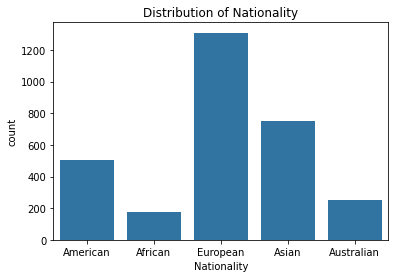

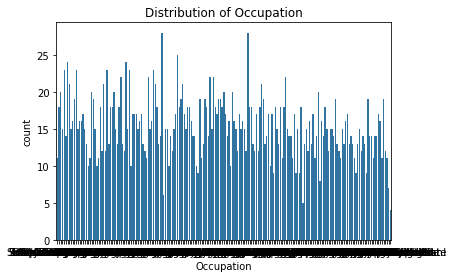

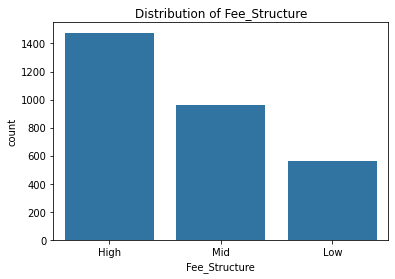

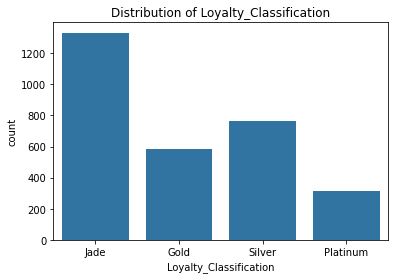

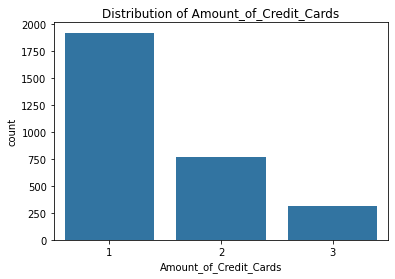

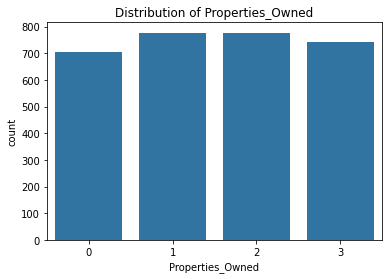

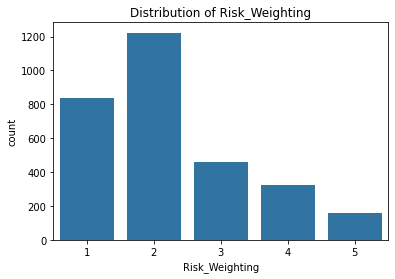

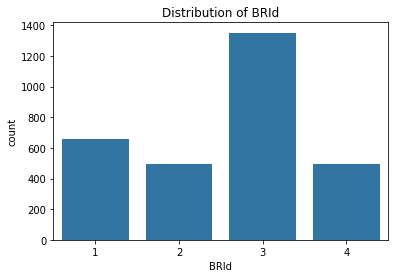

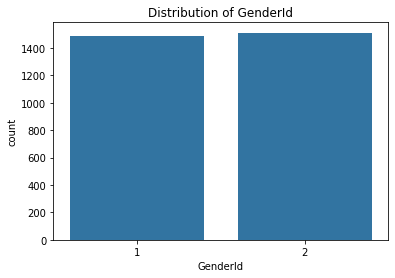

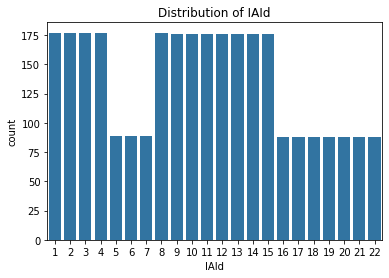

In [21]:
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

<h4 style="color:black;">Key Insights for Distribution of Nationality:</h4>
<p>
1. European Market Dominance: European customers (1400) represent the bank's largest segment, indicating a strong foothold in this region.
<br>
2. Growing Asian Market: With 800 Asian customers, there’s potential to expand services and customize offerings for this demographic.
<br>
3. Solid American Presence: The American customer base (500) suggests a significant yet under-tapped opportunity for region-specific banking products.
<br>
4. Smaller African and Australian Segments: African (200) and Australian (300) markets are comparatively smaller, presenting opportunities for targeted growth and outreach strategies.
</p>

<h4 style="color:black;">Key Insights for Distribution of Fee Structure:</h4>
<p>
1. High Fee Structure Dominance: The majority of customers (1500) are on a high fee structure, indicating a preference or eligibility for premium banking services.
<br>
2. Mid Fee Structure Segment: With 1000 customers, the mid-fee structure represents a significant portion of the customer base, offering potential for upselling higher-tier services.
<br>
3. Low Fee Structure: The 600 customers on low fee structures suggest opportunities for the bank to offer more affordable options or incentives to upgrade.
</p>

<h4 style="color:black;">Key Insights for Distribution of Loyalty:</h4>
<p>
1. Jade Loyalty Dominance: The majority of customers (1400) are in the Jade loyalty tier, indicating strong customer retention and engagement at the highest loyalty level.
<br>
2. Silver and Gold Segments: With 800 Silver and 600 Gold customers, there is a solid middle-tier presence, suggesting opportunities for tier upgrades through targeted offers.
<br>
3. Platinum Tier Opportunity: The 300 Platinum customers represent a smaller, exclusive segment, which can be leveraged for high-value services and premium offerings.
</p>

<h4 style="color:black;">Key Insights for Distribution of Amount of Credit Cards:</h4>
<p>
1. Majority with 1 Credit Card: The majority of customers (1900) have only one credit card, suggesting a large market for cross-selling additional credit card products.
<br>
2. Moderate Adoption of 2 Cards: With 750 customers holding two cards, there is potential for targeted campaigns to encourage customers to expand their credit card portfolio.
<br>
3. Small Group with 3 Cards: The 300 customers with three cards represent a smaller, more engaged group, which could be targeted for premium card offerings or higher credit limits.
</p>

<h4 style="color:black;">Key Insights for Distribution of Properties Owned:</h4>
<p>
1. Significant Ownership of 1-2 Properties: A large portion of customers (800 each with 1 or 2 properties) suggests a strong middle-market segment with a moderate level of wealth.
<br>
2. 700 Customers with No Properties: The 700 customers without properties may represent younger or less financially established individuals, indicating potential for targeted property investment products.
<br>
3. High Engagement with 3 Properties: The 750 customers owning three properties indicate a wealthier segment, presenting opportunities for premium services like mortgage products or investment advisory.
</p>

<h2 style="color:black;">Univariate Analysis - Numerical Columns </h2>

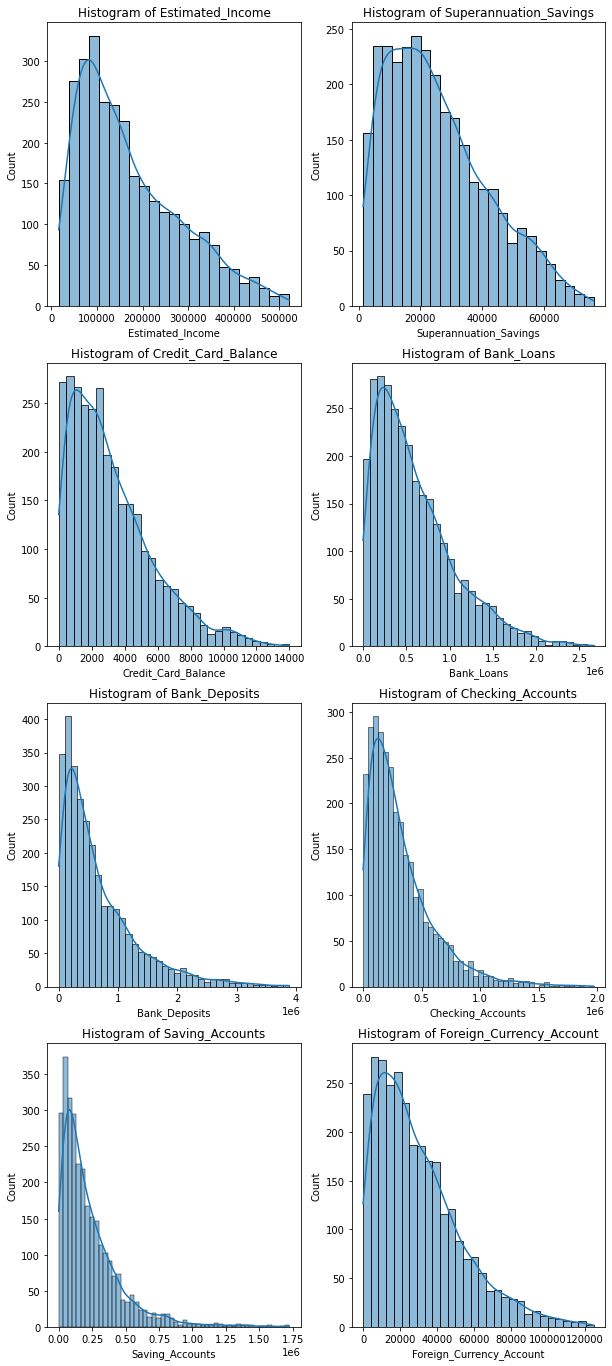

In [22]:
plt.figure(figsize=(10,24))
for i,col in enumerate(numerical_df):
    plt.subplot(4,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.show()

<h4 style='color:black;'>Insights from Right-Skewed Distributions in Numerical Columns:</h4>
<p>
1. Concentration of Lower Values: All numerical features show a concentration of data on the lower end, with fewer higher values. This could indicate that most customers have relatively lower values in categories like income, savings, and credit card balances.
<br>
2. Potential for Targeted Offerings: Since the distributions are right-skewed, this suggests that most customers are not leveraging higher balances or higher incomes, which could present an opportunity for the bank to introduce products targeting this large, underserved segment.
<br>
3. Outliers: The long tail on the right of each histogram indicates the presence of outliers or a small group of customers with significantly higher values, which might require different strategies, such as premium or custom products tailored to high-net-worth individuals.
</p>

<h2 style="color:black;">Bivariate Analysis</h2>

<h3 style='color: black;'>Scatter Plot: Estimated Income vs Credit Card Balance</h3>

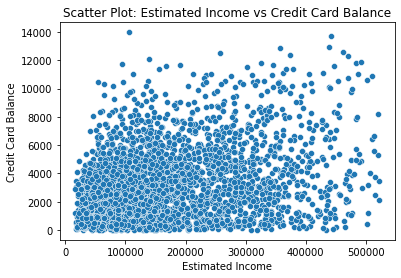

In [29]:
sns.scatterplot(x='Estimated_Income', y='Credit_Card_Balance', data=df)
plt.title('Scatter Plot: Estimated Income vs Credit Card Balance')
plt.xlabel('Estimated Income')
plt.ylabel('Credit Card Balance')
plt.show()

<h4 style="color:black;">Insights</h4>
<p>Higher Income, Higher Balance: Customers with higher estimated income tend to maintain higher credit card balances, while lower-income users generally keep their balances under ₹8,000—indicating a direct correlation between income and credit utilization.</p>

<h3 style='color: black;'>Scatter Plot: Age v/s Income</h3>

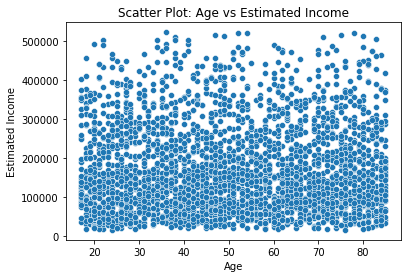

In [30]:
sns.scatterplot(x='Age', y='Estimated_Income', data=df)
plt.title('Scatter Plot: Age vs Estimated Income')
plt.xlabel('Age')
plt.ylabel('Estimated Income')
plt.show()

<h3 style='color:black;'>Correlation Heatmap for Numerical Features</h3>

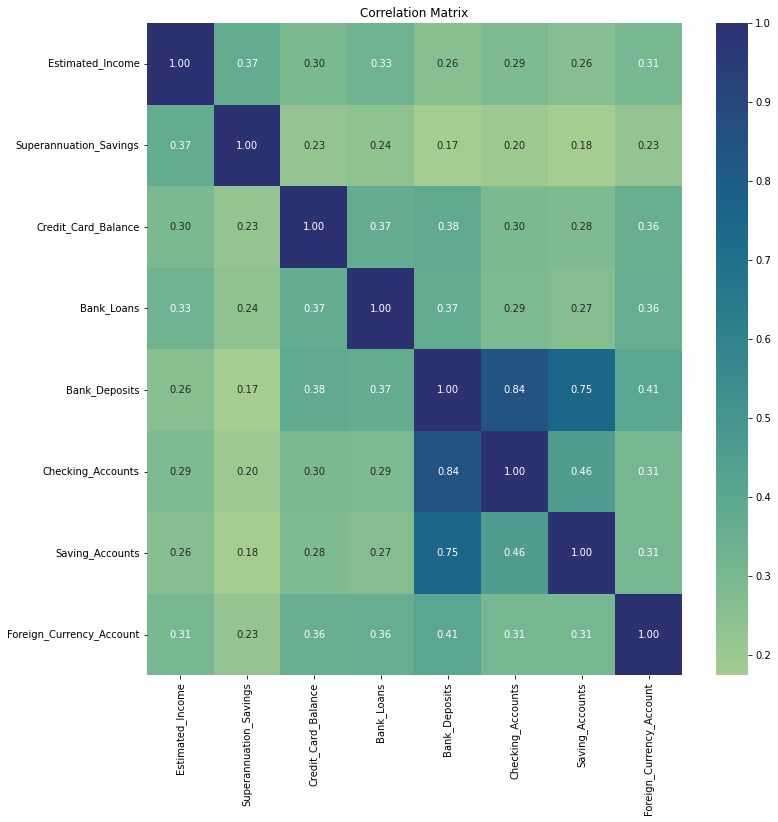

In [31]:
correlation_matrix = numerical_df.corr()  # Calculate correlation matrix for specified columns

plt.figure(figsize=(12,12))  # Set figure size (12 inches square)
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")  # Plot heatmap with specified settings
plt.title("Correlation Matrix")  # Set title for heatmap
plt.show()  # Display the heatmap

<h4 style="color:black;">Insights</h4>
<p>
1. Strong Link: Bank deposits have a strong positive correlation with checking (0.84) and saving accounts (0.75), suggesting deposits rise with these account balances.
<br>
2. Moderate Association: Bank deposits show a moderate correlation (0.41) with foreign currency accounts, indicating some overlap in customer profiles.
<br>
3. Account Synergy: Checking and saving accounts are moderately correlated (0.46), implying customers often maintain both.
</p>

<h3 style='color:black;'>Count Plot: Occupation vs Gender</h3>

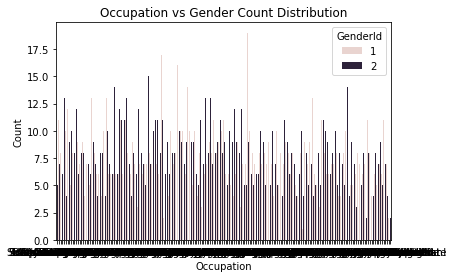

In [32]:
sns.countplot(x='Occupation', hue='GenderId', data=df)
plt.title('Occupation vs Gender Count Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

<h2 style="color:black;">Feature Engineering</h2>

<h3 style="color:black;">Tenure</h3>

In [33]:
df['Tenure'] = pd.to_datetime('today').year - df['Joined_Bank'].dt.year

<h3 style="color: black;">Distribution of Tenure</h3>

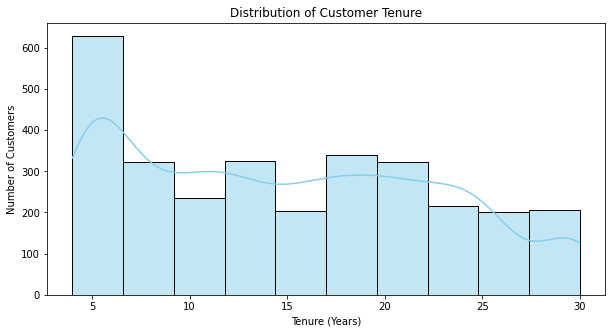

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Tenure'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Customers')
plt.show()

<h4 style="color: black;">Key Insights</h4>
<p>
1. High Recent Joiners (5 Years): The highest number of customers (600) have a tenure of 5 years, indicating a recent spike in customer acquisition. This could be due to recent marketing efforts, new offerings, or economic factors favoring account openings.
<br>
2. Stable Long-term Base: Customers with 15–30 years of tenure are fairly consistent (~200). This shows a stable core of long-term loyal customers.
<br>
3. Dip at 10 Years: Only 250 customers at the 10-year mark, lower than expected. Could indicate customer churn or less acquisition a decade ago.
<br>
4. 20-Year Spike: The count rises again at 20 years (300 customers), suggesting a past period of strong acquisition or retention success.
</p>

<h3 style="color: black;">Income band</h3>

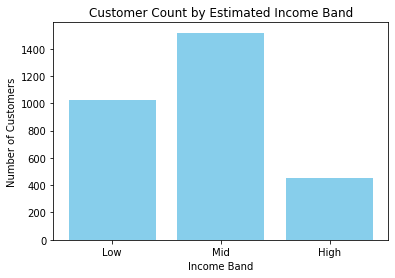

<AxesSubplot:>

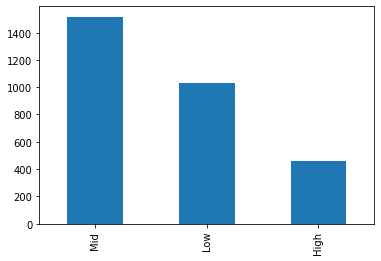

In [36]:
#Converting numberical column (Estimated income) to categorical column
# Converting 'Estimated_Income' column to a categorical income band for better analysis

# Step 1: Define bins and labels for income bands
bins = [0, 100000, 300000, float('inf')]  # Defining bins for Low, Mid, and High income bands
labels = ['Low', 'Mid', 'High']  # Labels for the income bands

# Step 2: Use pd.cut() to categorize income into defined bands
df['Income_Band'] = pd.cut(df['Estimated_Income'], bins=bins, labels=labels, right=False)

# Step 3: Count how many customers fall into each income band
income_band_counts = df['Income_Band'].value_counts().sort_index()

# Step 4: Plotting the distribution of income bands using a bar chart
plt.figure(figsize=(6, 4))  # Set figure size for better readability
plt.bar(income_band_counts.index, income_band_counts.values, color='skyblue')
plt.xlabel('Income Band')  # X-axis label
plt.ylabel('Number of Customers')  # Y-axis label
plt.title('Customer Count by Estimated Income Band')  # Chart title
plt.show()

# Alternatively, plot the income band counts using pandas plotting
df['Income_Band'].value_counts().plot(kind='bar')

<h4 style="color:black;">Key Insights:</h4>
<p>
1. Dominant Mid-Income Segment: The majority of customers (1400) fall in the mid-income band, highlighting the bank's core demographic.
<br>
2. Lower-Income Potential: With 1000 customers in the low-income band, there's potential for growth by targeting this group with affordable banking products.
<br>
3. Exclusive High-Income Group: The 400 high-income customers represent a smaller, but lucrative segment, ideal for premium services and wealth management.
<br>
4. Targeted Strategies: Tailored offerings for each income group could optimize customer engagement and revenue—more inclusive options for low-income and premium offerings for high-income customers.
</p>

<h3 style='color:black;'>Bar Plot: Mean Bank Loans by Income Band</h3>

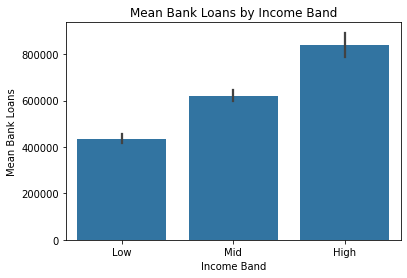

In [37]:
sns.barplot(x=df['Income_Band'], y='Bank_Loans', data=df, estimator='mean')
plt.title('Mean Bank Loans by Income Band')
plt.xlabel('Income Band')
plt.ylabel('Mean Bank Loans')
plt.show()

<h4 style="color:black;">Insights</h4>
<p>
1. Loan Size Grows with Income: Mean bank loan amounts increase significantly with income level.
<br>
2. High-Income Segment: Customers in the high-income band have the highest average loan (₹8.5L), indicating greater borrowing capacity.
<br>
3.Low-Income Constraint: The low-income group has the smallest average loan (₹4L), suggesting limited loan eligibility or borrowing needs.
</p>

<h3 style='color:black;'>Savings</h3>

In [41]:
df['Savings_Ratio'] = df['Bank_Deposits'] / (df['Estimated_Income'] + 1)  # +1 to avoid divide-by-zero

<h3 style='color:black;'>Savings-to-Income Ratio</h3>

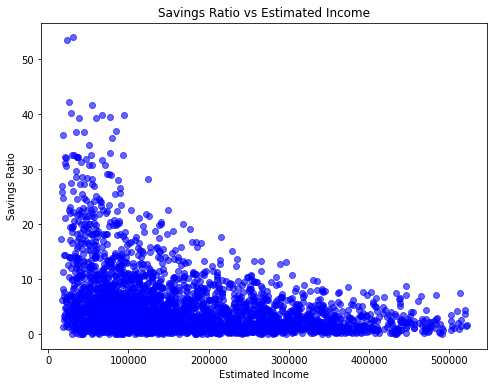

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Estimated_Income'], df['Savings_Ratio'], alpha=0.6, color='b')
plt.title('Savings Ratio vs Estimated Income')
plt.xlabel('Estimated Income')
plt.ylabel('Savings Ratio')
plt.show()

<h4 style='color:black;'>Insights</h4>
<p>
1. Income and Savings Ratio: People with an income of ₹10,000 show significant variability in their Savings Ratio, ranging from 0 to 25. This suggests that a wide range of savings habits exists, even at lower income levels.
<br>
2. Savings Limitations: For those earning ₹30,000 and ₹50,000, the Savings Ratio appears to be capped around 15, indicating that income beyond a certain point does not proportionally increase the savings ratio. This could suggest that other factors (e.g., lifestyle or financial obligations) are limiting savings growth.
<br>
3. Savings Potential at Higher Incomes: High-income individuals (earning ₹50,000) seem to have a lower savings ratio despite their higher earnings, pointing to possible underutilization of savings opportunities or increased discretionary spending.
<br>
4. Opportunities for Banks: Banks could explore targeted financial literacy programs for low-income individuals to enhance their savings ratio.<br>
There’s an opportunity to introduce savings products or investment plans for higher-income groups to optimize their savings ratio, especially given the observed cap at ₹15 for certain income groups.
</p>

<h3 style="color:black;">Long Term Customer</h3>

In [55]:
df['Is_Long_Term'] = df['Tenure'].apply(lambda x: 1 if x >= 12 else 0)

<h3 style="color:black;">Count of Long-Term and Short-Term Customers</h3>

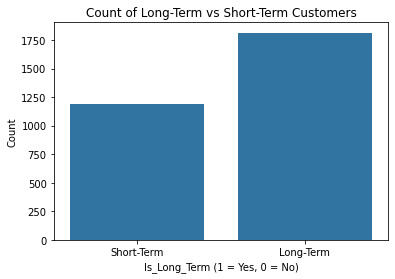

In [56]:
sns.countplot(x='Is_Long_Term', data=df)
plt.title('Count of Long-Term vs Short-Term Customers')
plt.xlabel('Is_Long_Term (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Short-Term', 'Long-Term'])
plt.show()

<h2 style='color:black;'>Other Trends/ Patterns</h2>

<h3 style='color:black;'>Average Estimated Income by Occupation</h3>

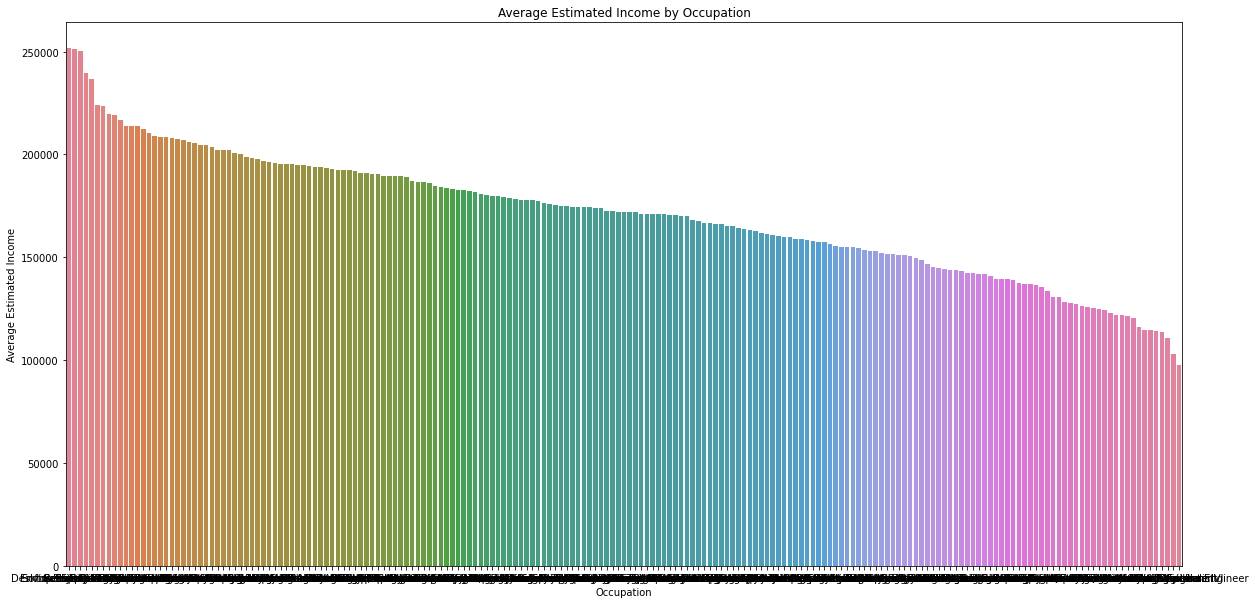

In [57]:
# Grouping and sorting
avg_income_by_occupation = df.groupby('Occupation')['Estimated_Income'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x=avg_income_by_occupation.index, y=avg_income_by_occupation.values, hue=avg_income_by_occupation.index, legend=False)

# Adding labels and title
plt.title('Average Estimated Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Estimated Income')
plt.show()

<h3 style='color:black;'>Total Credit Card Balance by Income Band</h3>

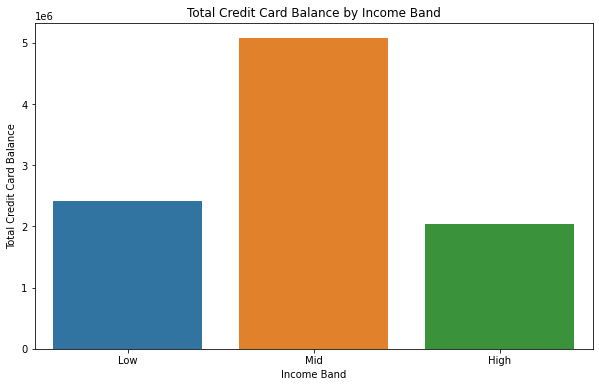

In [58]:
# Grouping and sorting
total_cc_balance_by_income = df.groupby('Income_Band')['Credit_Card_Balance'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=total_cc_balance_by_income.index, y=total_cc_balance_by_income.values, hue=total_cc_balance_by_income.index, legend=False)

# Adding labels and title
plt.title('Total Credit Card Balance by Income Band')
plt.xlabel('Income Band')
plt.ylabel('Total Credit Card Balance')
plt.show()

<h4 style="color:black;">Insights</h4>
<p>
1. Mid-Income Leads: Customers in the mid-income band hold the highest total credit card balance (₹5L), indicating higher spending or usage.
<br>
2. Low vs High: Despite higher earning potential, the high-income group has a lower total balance (₹2L) than the mid group, possibly due to better credit management.
<br>
3. Low-Income Usage: The low-income segment holds ₹2.5L, showing moderate reliance on credit.
</p>